In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [33]:
df=pd.read_csv('cancer.csv')

In [34]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

<Axes: >

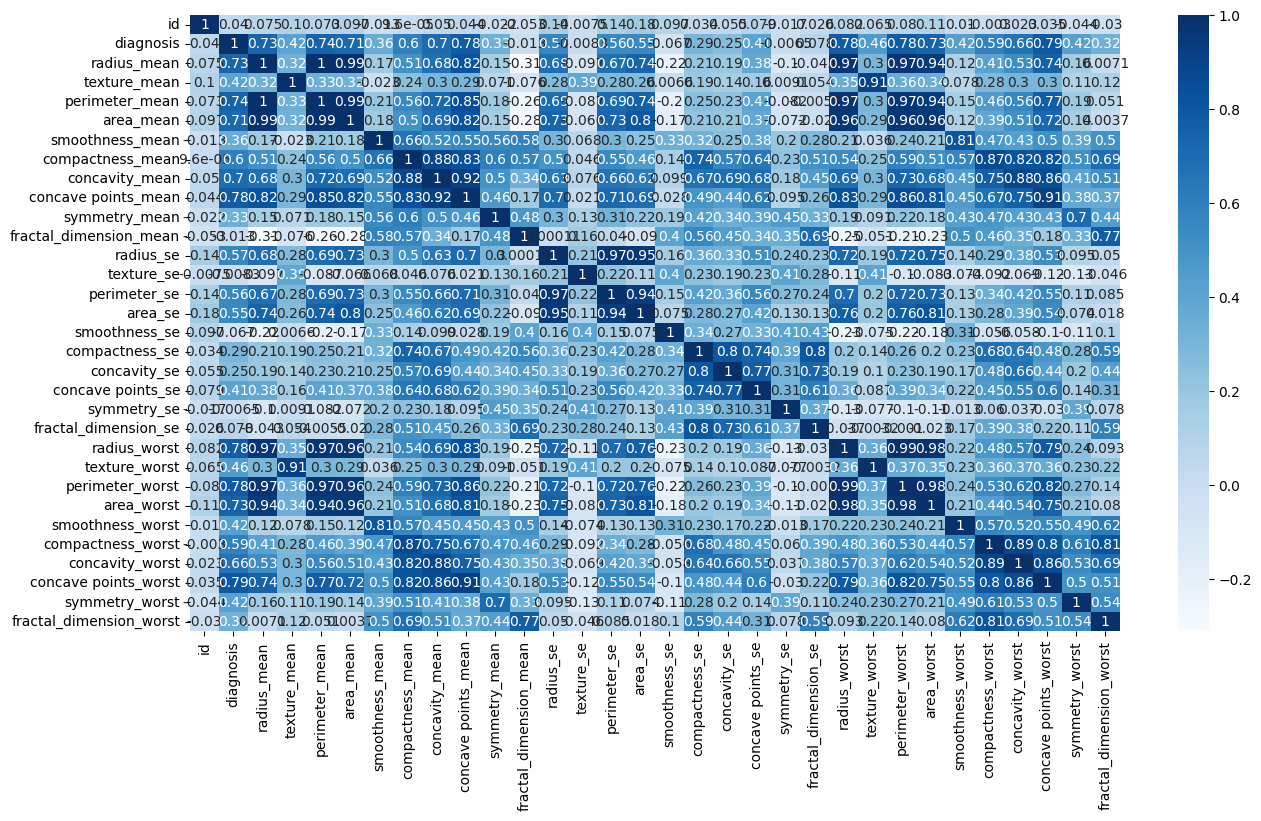

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [37]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

0.956140350877193


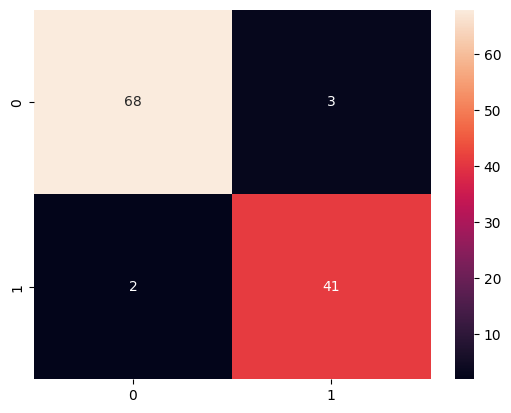

In [40]:
model1=SVC(kernel='linear',C=1.0,random_state=42)
model1.fit(X_train,y_train)

y_pred1=model1.predict(X_test)
acc1=accuracy_score(y_test,y_pred1)
cm1=confusion_matrix(y_test,y_pred1)
sns.heatmap(cm1,annot=True)
print(acc1)

0.9824561403508771


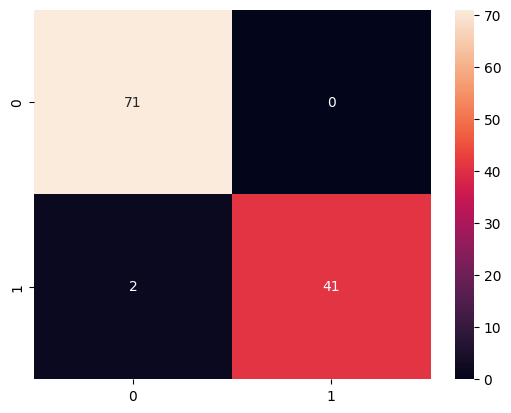

In [41]:
model2=SVC(kernel='rbf',C=1.0,random_state=42)
model2.fit(X_train,y_train)

y_pred2=model2.predict(X_test)
acc2=accuracy_score(y_test,y_pred2)
cm2=confusion_matrix(y_test,y_pred2)
sns.heatmap(cm2,annot=True)
print(acc2)

0.868421052631579


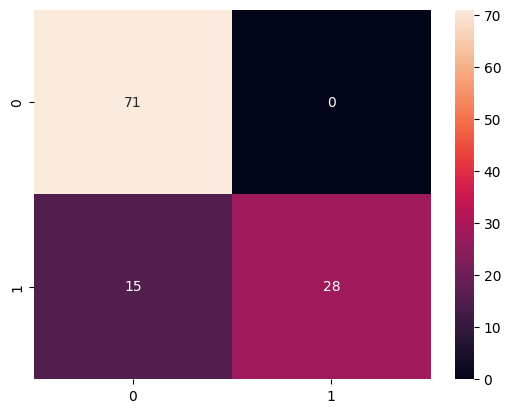

In [42]:
model3=SVC(kernel='poly',C=1.0,random_state=42)
model3.fit(X_train,y_train)

y_pred3=model3.predict(X_test)
acc3=accuracy_score(y_test,y_pred3)
cm3=confusion_matrix(y_test,y_pred3)
sns.heatmap(cm3,annot=True)
print(acc3)

<BarContainer object of 3 artists>

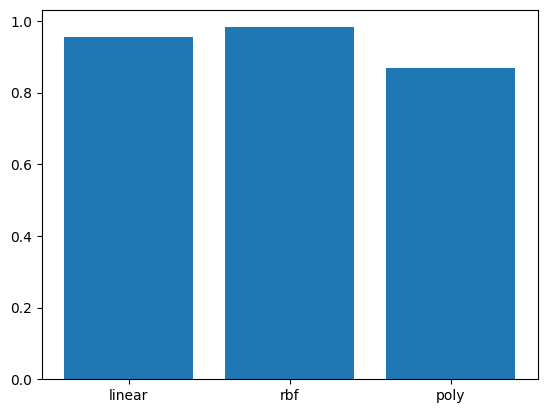

In [43]:
plt.bar(['linear','rbf','poly'],[acc1,acc2,acc3])

In [47]:

a=np.linspace(X_train[:,0].min()-1, X_train[:,0].max()+1, 500)
b=np.linspace(X_train[:,1].min()-1, X_train[:,1].max()+1, 500)

xx, yy = np.meshgrid(a,b)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='k')
plt.show()

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

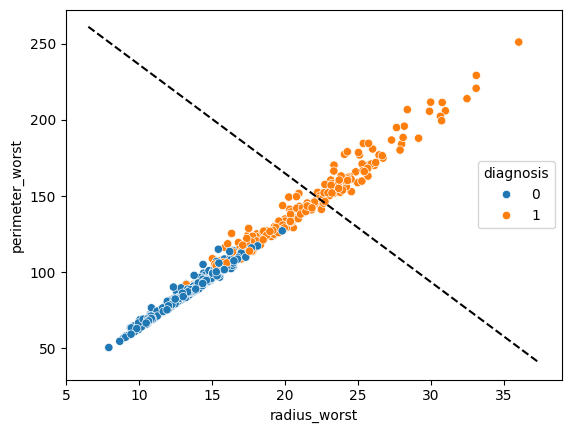

In [49]:
sns.scatterplot(data=df,x='radius_worst',y='perimeter_worst',hue='diagnosis')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

plt.plot([x_min, x_max], [y_max, y_min], color='black', linestyle='--')